####  IBM HR Analytics Dataset - Employee Attrition Prediction:

#### Introduction `

Employee attrition, the departure of employees from an organization, can have significant implications for workforce management, productivity, and overall business success. To address this challenge proactively, organizations turn to data-driven approaches, leveraging tools like predictive analytics. The IBM HR Analytics dataset serves as a valuable resource for understanding and predicting employee attrition, offering a comprehensive view of various factors that may influence an employee's decision to leave a company.

#### Dataset Overview:

The IBM HR Analytics dataset encompasses a diverse array of information related to employees within a corporate setting. It includes data on both professional and personal attributes, providing a holistic view of an employee's tenure. Key features within the dataset cover aspects such as job satisfaction, work environment, compensation, performance ratings, and other factors that may contribute to the decision to stay or leave.

#### Problem Statement:

"In the context of human resource management, the challenge is to develop a predictive model that can effectively identify and forecast employee attrition within an organization. The dataset provided by IBM HR Analytics contains a plethora of information about employees, encompassing various aspects of their professional and personal attributes. The objective is to leverage this dataset to create a robust machine learning model capable of predicting which employees are more likely to leave the company.

#### Key Aspects of the Dataset:

Demographic Information: Personal details of employees such as age, gender, and marital status.
Job-related Factors: Information on job roles, departments, and work environment conditions.
Compensation and Benefits: Data regarding salary, incentives, and other perks.
Performance Ratings: Evaluations of employee performance.
Employee Engagement: Metrics related to job satisfaction and engagement.

Steps :
    1-gather data and identify features and target
    2-Exploratory Data Analysis
    3-Model Building
    4-Model Evaluation  

In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# File reading

In [4]:
Emp = pd.read_csv("Employee-Attrition.csv")
Emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
Emp['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [6]:
Emp['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [7]:
Emp['PerformanceRating']


0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64

In [8]:
Emp.shape


(1470, 35)

In [9]:
Emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
Emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
#Descriptive Statistics
Emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
print(Emp.duplicated().value_counts())
Emp.drop_duplicates(inplace = True)
print(len(Emp))

False    1470
Name: count, dtype: int64
1470


In [13]:
Emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Target Feature Analysis

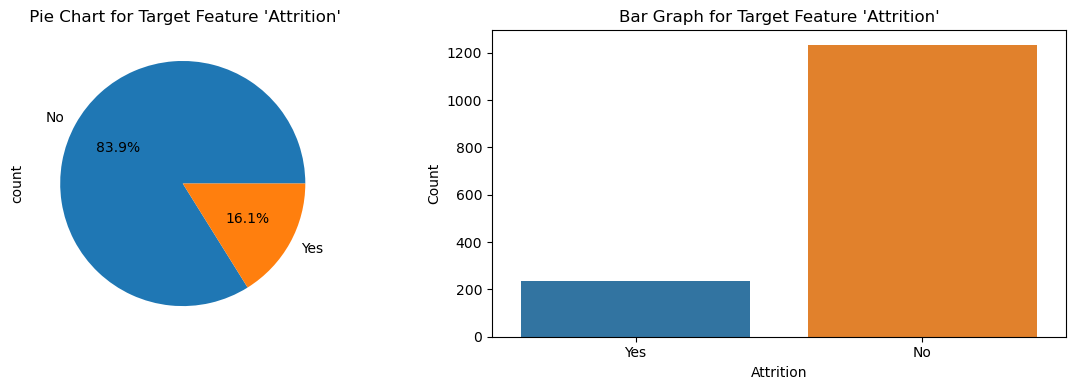

In [14]:
# Analysis of TARGET feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie Chart
plt.subplot(1, 2, 1)
Emp['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(" Pie Chart for Target Feature 'Attrition'")

# Bar Graph
plt.subplot(1,2,2)
sns.countplot(data = Emp, x = Emp['Attrition'] )
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title("Bar Graph for Target Feature 'Attrition'")

#Adjusting space between subplots
plt.tight_layout()

plt.show()

From above charts, we can conclude that out of 1470 employees, 16% of the employees left their job due to some reasons whereas other 84% of the mployees preferred to continue their job at the company.

Observation : Here we noticed that the target column is highly imbalanced. We need to balance by using Statistical Methods.

### Departmental Analysis:

In [15]:
dpt = Emp[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [16]:
dpt['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

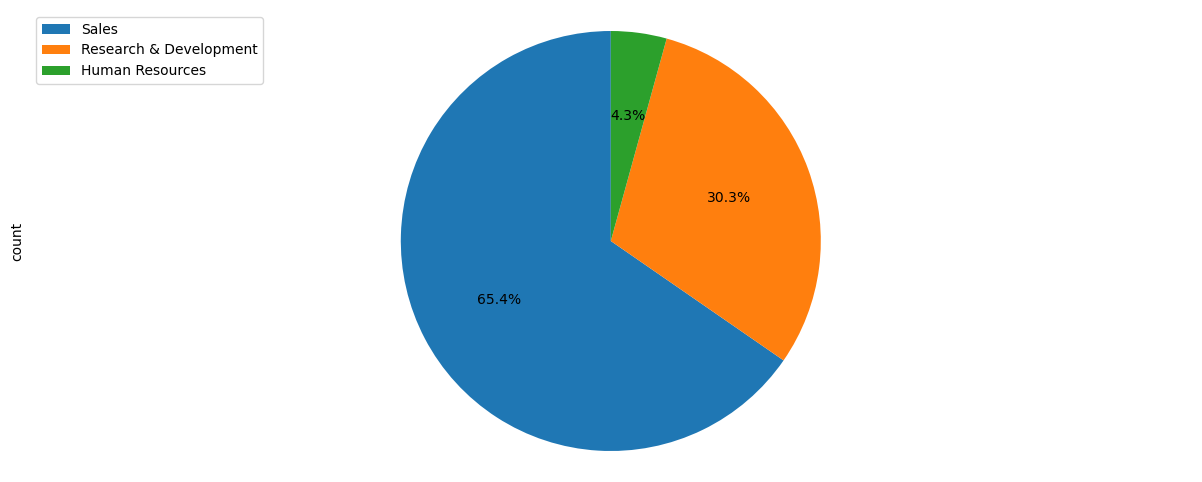

In [17]:
dpt['Department'].value_counts().plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%', 
                                      startangle=90,    
                                      labels=None)   
plt.axis('equal')
plt.legend(labels=dpt['Department'].unique(), loc='upper left') 
plt.show()

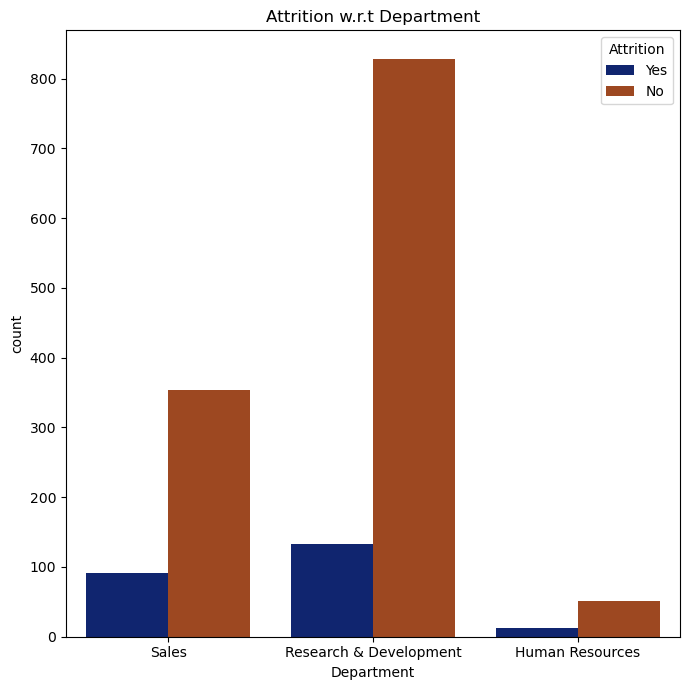

In [18]:
#department wrt attrition
plt.figure(figsize=(7,7))
sns.countplot(data=Emp,x = "Department",hue = "Attrition",palette = 'dark')
plt.title("Attrition w.r.t Department")
plt.tight_layout()
plt.show()

In [19]:
dpm = Emp.groupby("Department")['Attrition'].value_counts().unstack()
dpm

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


###### Observation:

from above analysis the percentage of attrition of R&D, Sales, HR are 13.83%, 20.62%, 19.04% so the attrition rate of Sales Departmenmt is highest

### Gender Analysis :-

In [20]:
gen = Emp[['Gender','Attrition']]
gen.head()

,Gender,Attrition
0,Female,Yes
1,Male,No
2,Male,Yes
3,Female,No
4,Male,No


In [21]:
gen['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

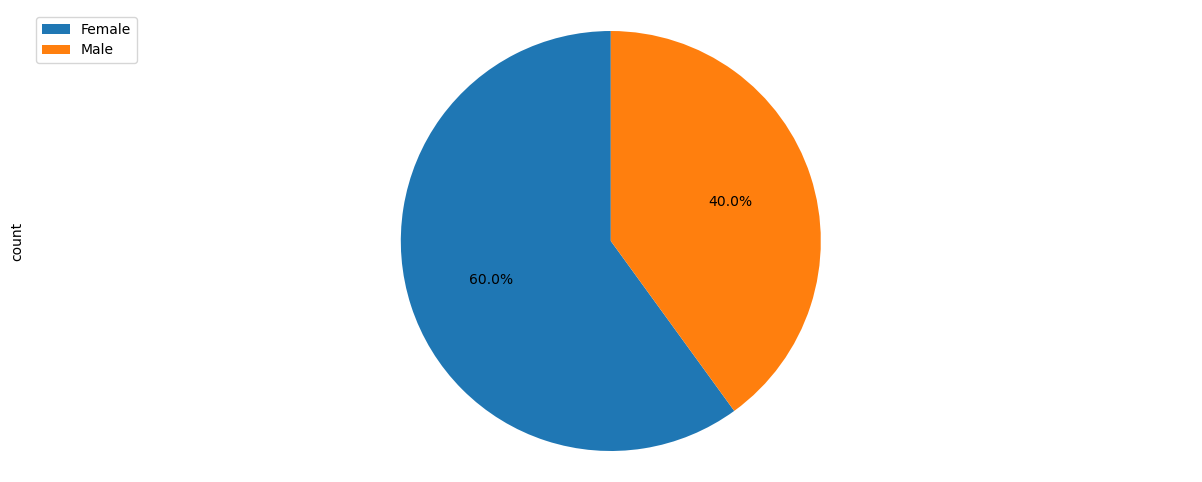

In [22]:
gen['Gender'].value_counts().plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%', 
                                      startangle=90,    
                                      labels=None)   
plt.axis('equal')
plt.legend(labels=gen['Gender'].unique(), loc='upper left') 
plt.show()

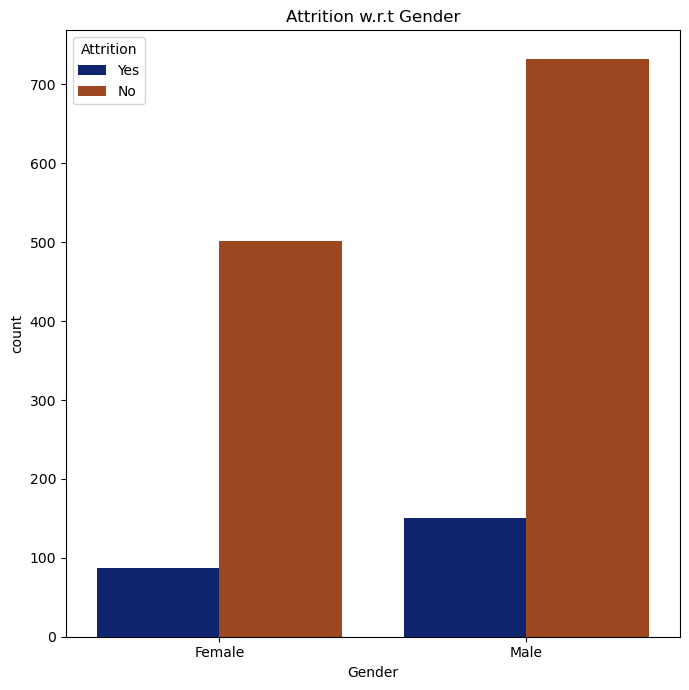

In [23]:
#gender wrt attrition
plt.figure(figsize=(7,7))
sns.countplot(data=Emp,x = "Gender",hue = "Attrition",palette = 'dark')
plt.title("Attrition w.r.t Gender")
plt.tight_layout()
plt.show()

In [24]:
gen = Emp.groupby("Gender")['Attrition'].value_counts().unstack()
gen

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


###### Observation:

from above analysis the percentage of attrition of Male , Feamale are 17%, 14.79% so the attrition rate of Males is highest

### Analysis Of Marital Satus:-

In [25]:
ms = Emp[['MaritalStatus','Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [26]:
ms['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

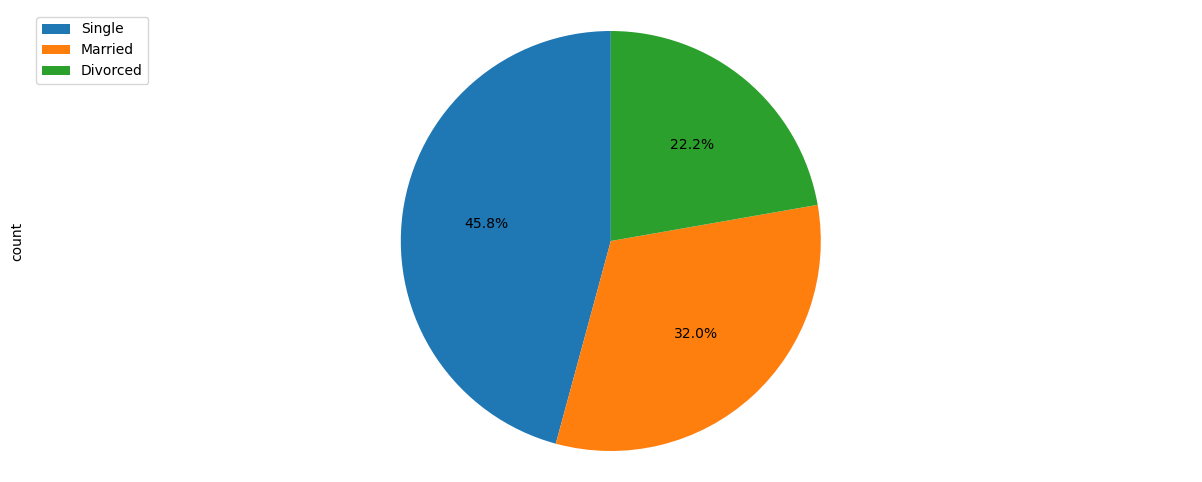

In [27]:
ms['MaritalStatus'].value_counts().plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%', 
                                      startangle=90,    
                                      labels=None)   
plt.axis('equal')
plt.legend(labels=ms['MaritalStatus'].unique(), loc='upper left') 
plt.show()

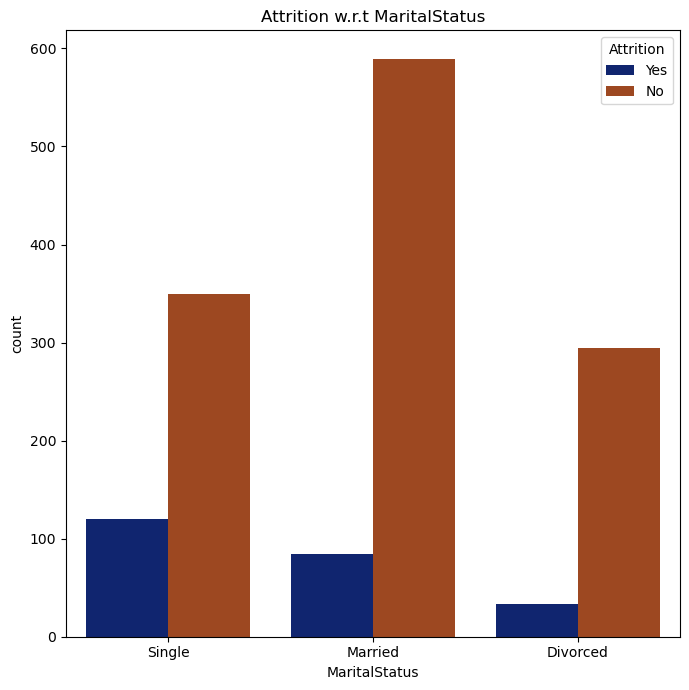

In [28]:
#Marital status wrt attrition
plt.figure(figsize=(7,7))
sns.countplot(data=Emp,x = "MaritalStatus",hue = "Attrition",palette = 'dark')
plt.title("Attrition w.r.t MaritalStatus")
plt.tight_layout()
plt.show()

In [29]:
ms = Emp.groupby("MaritalStatus")['Attrition'].value_counts().unstack()
ms

Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


#### Observation:

from above analysis percentage of attrition of Single(25.53%), Married(12.48%), Divorced(10.09%) so the highest is of singles

#### Distribution Of Age

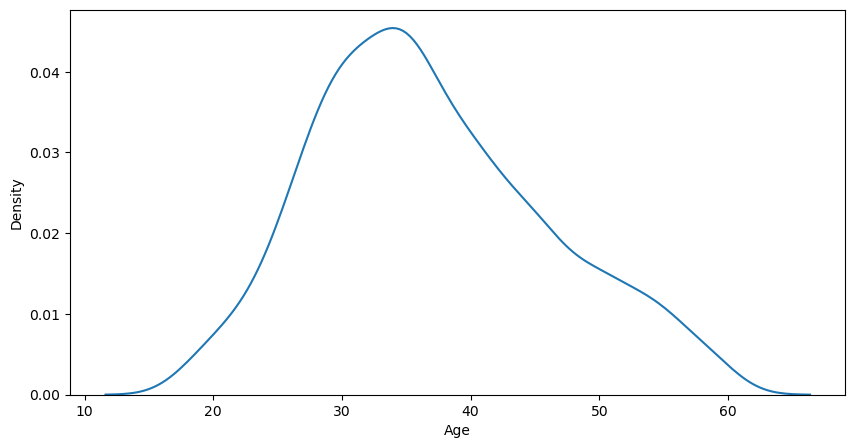

In [31]:
#distribution of age
plt.figure(figsize=(10,5))
sns.distplot(Emp['Age'],hist = False)
plt.show()

##### Observation

Age Column is very well normalised, most of employees age between 25 to 45

#### In our Data we are having some of the numerical columns which are label encoded for us ,they are ordinal labels, so lets have a look at them first

In [32]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement',
                    'JobSatisfaction','PerformanceRating','RelationshipSatisfaction',
                    'WorkLifeBalance']
Emp[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


there are 2 type of categorical data

1)ordinal - data that has order - eg.performancerating, 5 better than 4
if customer gives rating like good,better,best -->1,2,3

2)Nominal - colors - red,green,blue - subjective categorical data - with no particularly defined oreder

### Educational Analysis

In [33]:
Emp['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [34]:
ed = Emp[['Education','Attrition']]
ed.head()

,Education,Attrition
0,2,Yes
1,1,No
2,2,Yes
3,4,No
4,1,No


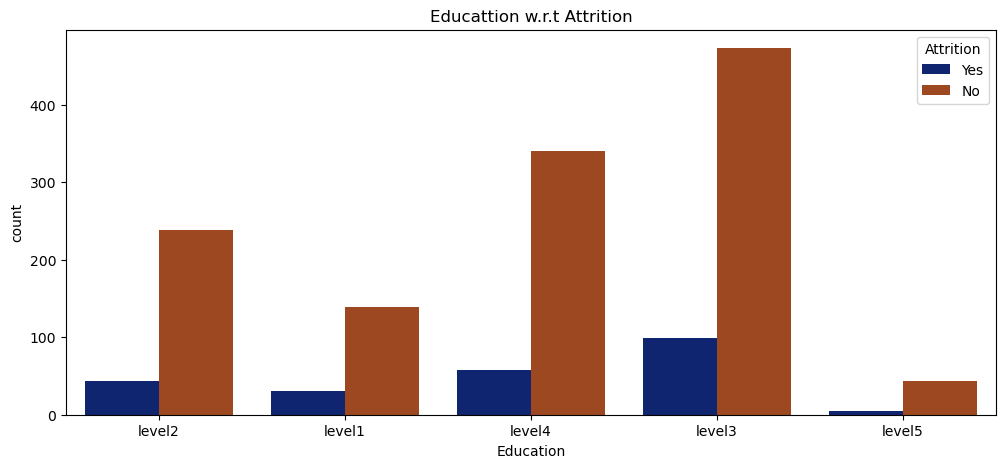

In [38]:
edu = {1:'level1',2:'level2',3:'level3',4:'level4',5:'level5'}
plt.figure(figsize = (12,5))
sns.countplot(x=Emp['Education'].map(edu),hue = 'Attrition', data = Emp,palette = 'dark')
plt.title('Educattion w.r.t Attrition')

plt.show()

In [39]:
ed = Emp.groupby("Education")['Attrition'].value_counts().unstack()
ed

Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


#### Observation:

from above analysis attrition rate of 1(18.23)>3(17.30)>2(15.60)>4(14.57)>5(10.63) i.e ppl belong from level 5 eductaion having low attritoion rate while pplbelongs to first level education having high attrtion rate

### Analysis Of the Rating Features

#### >JobSatisfaction

#### >EnvironmentSatisfaction

#### >RelationshipSatisfaction

#### >JobInvolvement

#### >WorkLifeBalance

#### >PerformanceRating

In [34]:
Emp['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

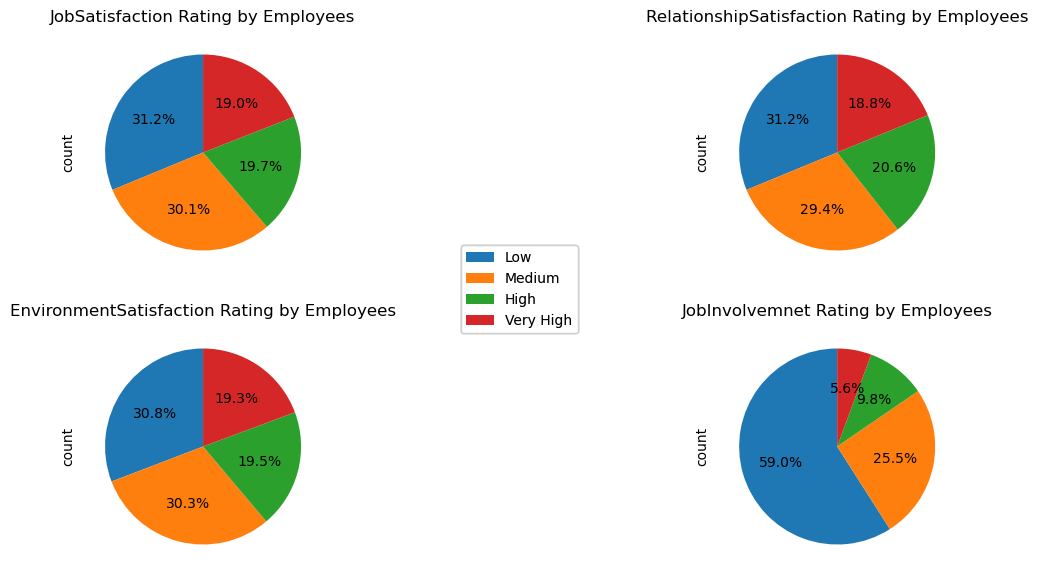

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels = 'Low','Medium','High','Very High'

Emp['JobSatisfaction'].astype(str).value_counts().plot(kind = 'pie',
                                                       figsize = (15,7),
                                                       autopct = '%1.1f%%',
                                                       labels= None,
                                                       ax = ax1,
                                                       startangle =90)
ax1.set_title('JobSatisfaction Rating by Employees')
fig.legend(labels = labels,loc = 'center')

Emp['RelationshipSatisfaction'].astype(str).value_counts().plot(kind = 'pie',
                                                                figsize = (15,7),
                                                                autopct = '%1.1f%%',
                                                                labels = None, 
                                                                ax = ax2,
                                                                startangle =90)
ax2.set_title('RelationshipSatisfaction Rating by Employees')
fig.legend(labels = labels,loc ='center')

Emp['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                                                               figsize = (15,7),
                                                               autopct='%1.1f%%',
                                                               labels = None,
                                                               ax = ax3,
                                                               startangle =90)
ax3.set_title('EnvironmentSatisfaction Rating by Employees')
fig.legend(labels = labels,loc ='center')

Emp['JobInvolvement'].astype(str).value_counts().plot(kind = 'pie',
                                                      figsize=(15,7),
                                                      autopct='%1.1f%%',
                                                      labels = None,
                                                      ax = ax4,
                                                      startangle =90)
ax4.set_title('JobInvolvemnet Rating by Employees')
fig.legend(labels = labels,loc = 'center')


plt.show()

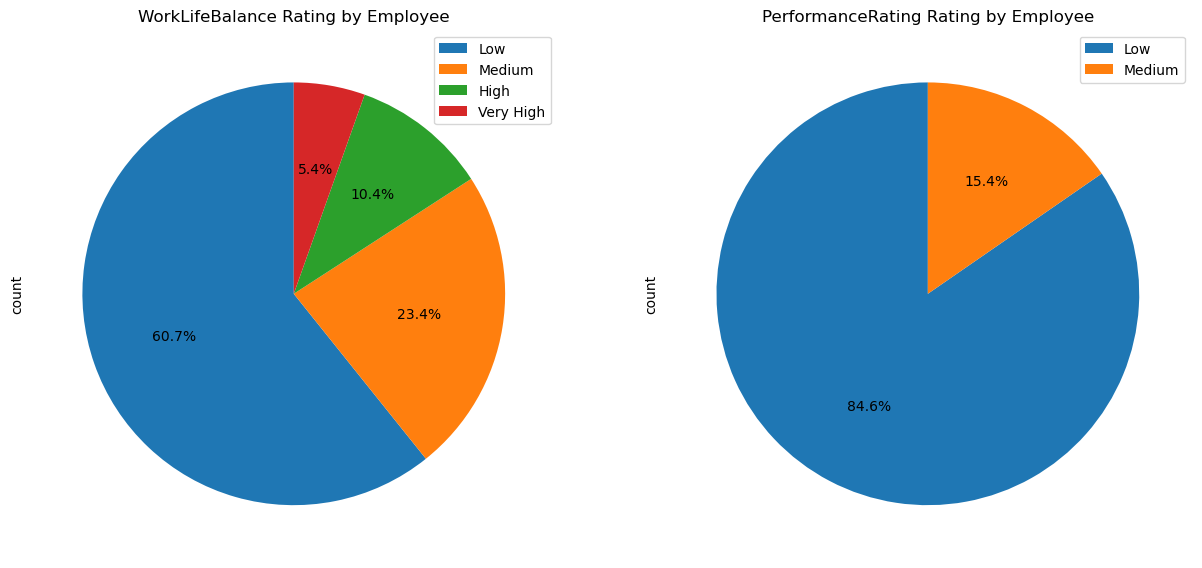

In [36]:
fig2 =plt.figure()

ax5 = fig2.add_subplot(121)
ax6 = fig2.add_subplot(122)

label_list1 = 'Bad','Good','Better','Best'
label_list2 = 'Average','Good','Excellent','Outstanding'

Emp['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',figsize=(15,7),autopct = '%1.1f%%',labels = None,ax = ax5,startangle=90)
ax5.set_title('WorkLifeBalance Rating by Employee')
ax5.legend(labels = labels ,loc ='upper right')

Emp['PerformanceRating'].astype(str).value_counts().plot(kind='pie',figsize=(15,7),autopct = '%1.1f%%',labels = None,ax = ax6,startangle=90)
ax6.set_title('PerformanceRating Rating by Employee')
ax6.legend(labels = labels ,loc ='upper right')

plt.show()

#### Analysis of business Travel Feature

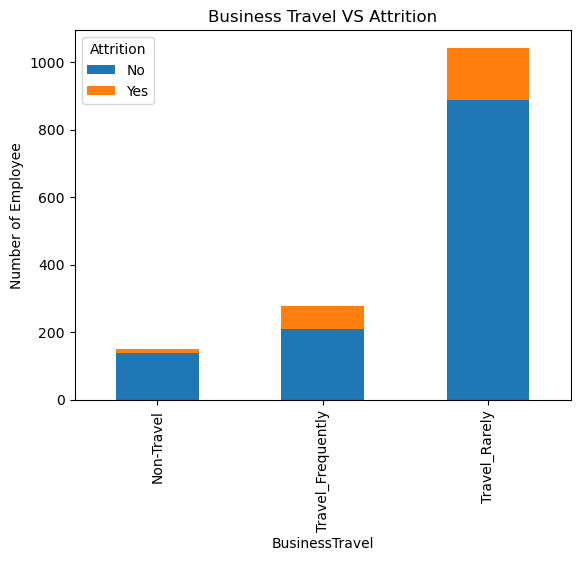

In [37]:
props = Emp.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

#### From above data we got to know that emploees who travel frequently have less attrition rate than employees who travel rarely

--> To reduce this attrition the best way is to conduct monthly survey and assign travel according to the employees business travel interest

### Label Encoding

Label encoding is a technique used in machine learning and data preprocessing to convert categorical data into numerical format. In this process, each unique category or label is assigned a unique integer value. This helps in representing categorical variables with numerical values, making it easier for machine learning algorithms to work with such data.

For example, consider a categorical variable "Color" with labels "Red," "Green," and "Blue." After label encoding, these labels might be assigned numerical values like 0, 1, and 2, respectively. This numerical representation allows algorithms to interpret and process the data more effectively.

###### Target Variable(Attrition)

In [38]:
Emp['Attrition'] = Emp['Attrition'].replace({'No':0,'Yes':1})
Emp['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

###### Encode Binary Variables

In [39]:
Emp["Gender"] = Emp['Gender'].map({'Male':0,'Female':1})
Emp['OverTime'] = Emp['OverTime'].map({'No':0,'Yes':1})


In [40]:
Emp['Gender']


0       1
1       0
2       0
3       1
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Gender, Length: 1470, dtype: int64

In [41]:
Emp['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [42]:
Emp['Over18'] = Emp['Over18'].map({'Y':1,'No':0})

In [43]:
Emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [44]:
from sklearn.preprocessing import LabelEncoder
catcols = ['BusinessTravel','Department','EducationField','MaritalStatus','JobRole']
le = LabelEncoder()
for i in catcols:
    
    Emp[i] = le.fit_transform(Emp[i])

In [45]:
Emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
Emp.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

### Machine Learning : splitting the data into Training nad testing sample

For creating model we dont use full data ,some data randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data on which the model is built is known as training data. 
Generally 70% of data is used as Training Data and 30% data is used as Testing Data

In [47]:
x = Emp.drop(['Attrition','Over18'],axis = 1) #input features
y = Emp['Attrition'] #output Feature

#### Resampling


Resampling is a common technique used to address imbalanced datasets, where one class has significantly fewer samples than another. Imbalanced datasets can lead machine learning models to be biased towards the majority class, making it challenging for the model to accurately predict the minority class. There are two main approaches to resampling: oversampling and undersampling.

1).Oversampling:

Random Oversampling: Duplicate random instances of the minority class to balance the class distribution.

SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class by interpolating between existing minority class instances.

2).Undersampling:

Random Undersampling: Remove random instances from the majority class to balance the class distribution.

Cluster Centroids: Replace clusters of the majority class with the centroid of each cluster.

In [48]:
# to balance our data  
# we can increase 10% to 90% -- oversampling--> when we have smaller dataset ,we dont want to lose info we alrdy have
# we can reduce 90% to 10 % -- undersampling--> when we have a lot of data , because we can afford to lose some data

 Here We are going to use Oversampling (RandomOversampling)

In [49]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(random_state=1)
x_ros,y_ros = ros.fit_resample(x,y)
print('Original dataset:',Counter(y))
print('reshaped dataset:',Counter(y_ros))


Original dataset: Counter({0: 1233, 1: 237})
reshaped dataset: Counter({1: 1233, 0: 1233})


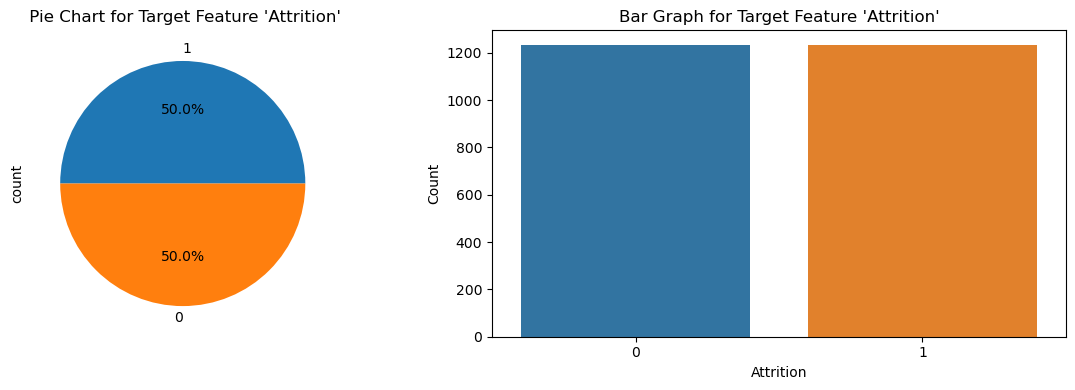

In [50]:
# Analysis of TARGET feature after oversampling 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie Chart
plt.subplot(1, 2, 1)
y_ros.value_counts().plot.pie(autopct='%1.1f%%')
plt.title(" Pie Chart for Target Feature 'Attrition'")

# Bar Graph
plt.subplot(1,2,2)
sns.countplot(data = Emp, x = y_ros )
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title("Bar Graph for Target Feature 'Attrition'")

#Adjusting space between subplots
plt.tight_layout()

plt.show()

In [51]:
# split the data 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 42)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [52]:
logreg = LogisticRegression()
svm = SVC()
knn = neighbors.KNeighborsClassifier()
rfc = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [53]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    cnf_matrix = confusion_matrix(ytest,ypred)
    print('Accuracy',accuracy_score(ytest,ypred))
    
    print("Classification Report:",'\n',classification_report(ytest,ypred))
    return model

In [54]:
def plot_confusion_matrix_and_roc_curve(classifier, xtrain, ytrain, xtest, ytest):
    # Train the classifier
    classifier.fit(xtrain, ytrain)
    
    # Make predictions on the test set
    ypred = classifier.predict(xtest)
    
    # Confusion Matrix
    cnf_matrix = confusion_matrix(ytest, ypred)
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.title('Confusion Matrix')
    
    # ROC Curve
    ax2 = fig.add_subplot(1, 2, 2)
    y_probabilities = classifier.predict_proba(xtest)[::, 1]
    fpr, tpr, thresholds = roc_curve(ytest, y_probabilities)
    roc_auc = roc_auc_score(ytest, y_probabilities)
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    
    plt.show()

# Example usage:
# Replace `YourClassifier` with the actual classifier you want to use (e.g., LogisticRegression, RandomForestClassifier, etc.)
# Call the function with your data
# plot_confusion_matrix_and_roc_curve(YourClassifier(), xtrain, ytrain, xtest, ytest)

#### LOGISTIC REGRESSION

In [55]:
mymodel(logreg)

Accuracy 0.8639455782312925
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       1.00      0.02      0.03        61

    accuracy                           0.86       441
   macro avg       0.93      0.51      0.48       441
weighted avg       0.88      0.86      0.80       441



LogisticRegression()

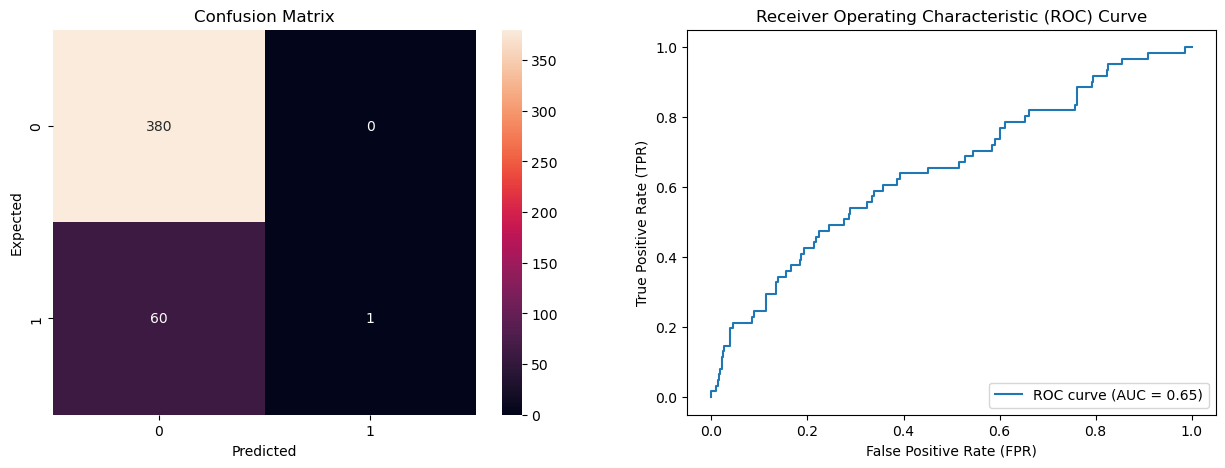

In [56]:
plot_confusion_matrix_and_roc_curve(logreg, xtrain, ytrain, xtest, ytest)

#### KNEIGHBORS CLASSIFIER

In [57]:
mymodel(knn)

Accuracy 0.8276643990929705
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       380
           1       0.24      0.11      0.16        61

    accuracy                           0.83       441
   macro avg       0.56      0.53      0.53       441
weighted avg       0.78      0.83      0.80       441



KNeighborsClassifier()

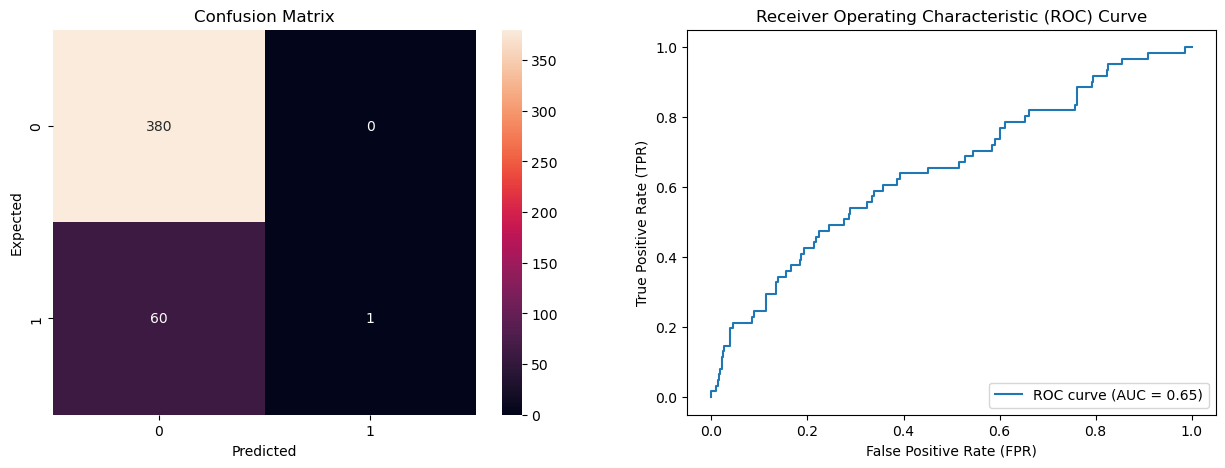

In [58]:
plot_confusion_matrix_and_roc_curve(logreg, xtrain, ytrain, xtest, ytest)

#### RANDOM FOREST CLASSIFIER

In [59]:
mymodel(rfc)

Accuracy 0.8639455782312925
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.55      0.10      0.17        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.55       441
weighted avg       0.83      0.86      0.82       441



RandomForestClassifier()

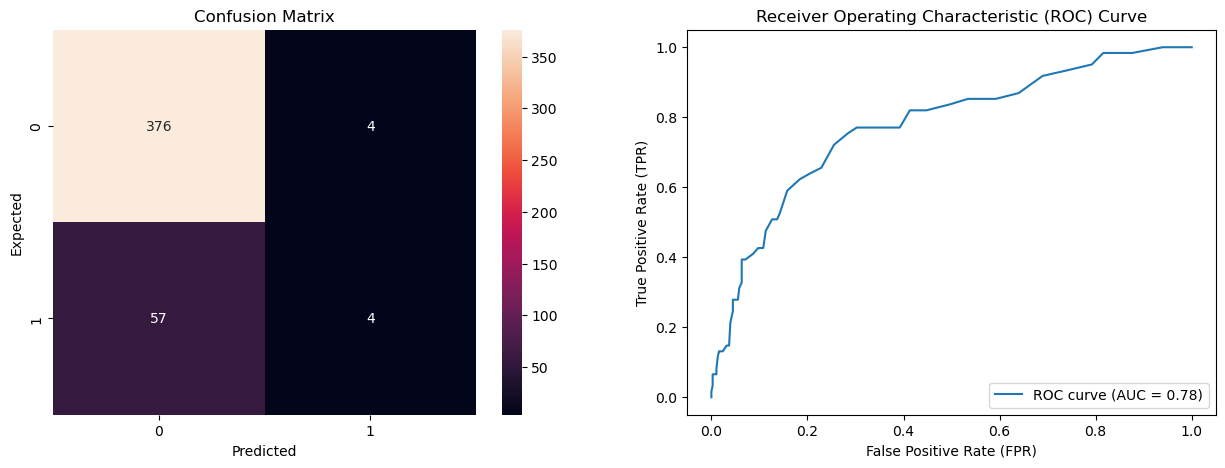

In [60]:
plot_confusion_matrix_and_roc_curve(rfc, xtrain, ytrain, xtest, ytest)

#### GRADIENT BOOSTING

In [61]:
mymodel(gb)

Accuracy 0.8775510204081632
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.62      0.30      0.40        61

    accuracy                           0.88       441
   macro avg       0.76      0.63      0.67       441
weighted avg       0.86      0.88      0.86       441



GradientBoostingClassifier()

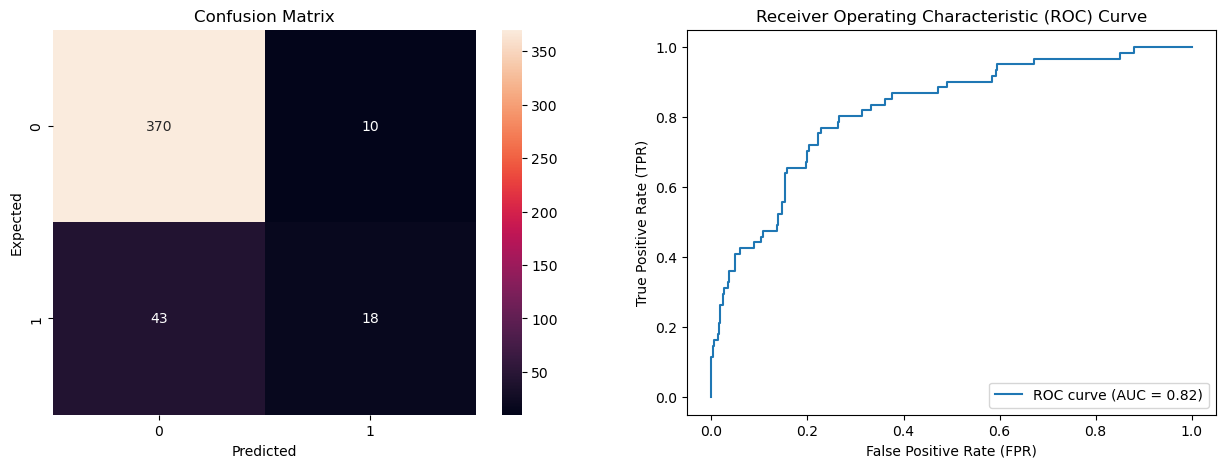

In [62]:
plot_confusion_matrix_and_roc_curve(gb, xtrain, ytrain, xtest, ytest)

#### SVM

In [63]:
mymodel(svm)

Accuracy 0.8616780045351474
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



SVC()

In [64]:
svm = SVC(kernel = 'poly')
mymodel(svm)

Accuracy 0.8616780045351474
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



SVC(kernel='poly')

In [65]:
svm = SVC(kernel = 'sigmoid')
mymodel(svm)

Accuracy 0.7709750566893424
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       380
           1       0.16      0.15      0.15        61

    accuracy                           0.77       441
   macro avg       0.51      0.51      0.51       441
weighted avg       0.77      0.77      0.77       441



SVC(kernel='sigmoid')

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid= {'C':[1,10],'gamma':[1,10],'kernel':['rbf']}

In [68]:
gs = GridSearchCV(svm,param_grid,verbose = 3) #svm is object here which is from svc class
gs.fit(xtrain,ytrain)
ypred = gs.predict(xtest)# verbose = 3 is for diplaying purpose of info 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.830 total time=   0.1s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.830 total time=   0.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.830 total time=   0.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.825 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.829 total time=   0.1s
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.830 total time=   0.1s
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.830 total time=   0.1s
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.830 total time=   0.1s
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.825 total time=   0.1s
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.829 total time=   0.1s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.830 total time=   0.1s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

In [69]:
gs.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [70]:
svm = gs.best_estimator_
svm.fit(xtrain,ytrain)
ypred= svm.predict(xtest)

In [71]:
cs = classification_report(ytest,ypred)
print(cs)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



#### XGBOOST 

In [72]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [115]:
import xgboost as xgb
xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
mymodel(xgb)

Accuracy 0.8707482993197279
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.58      0.25      0.34        61

    accuracy                           0.87       441
   macro avg       0.73      0.61      0.64       441
weighted avg       0.85      0.87      0.85       441



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

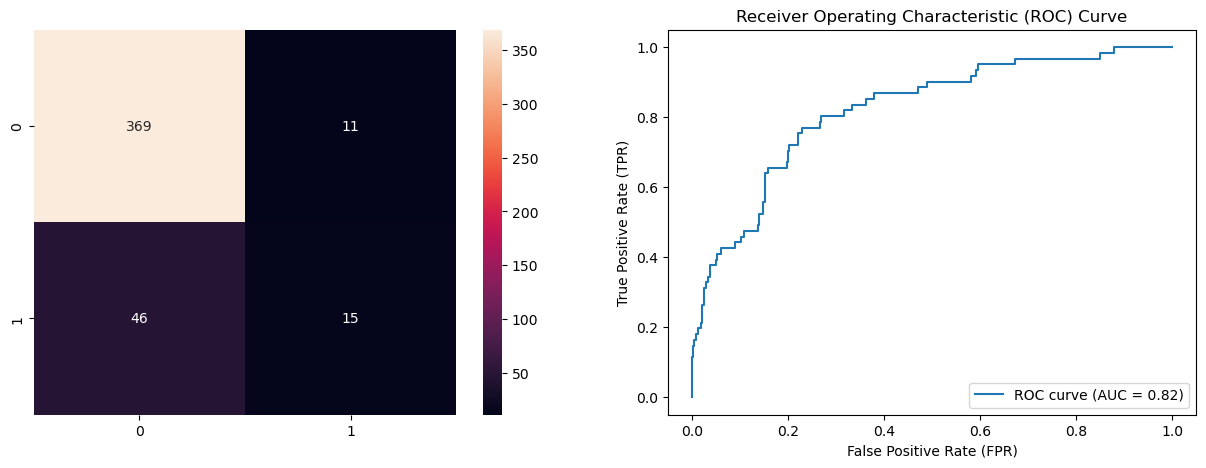

In [116]:
ypred = xgb.predict(xtest)
cnf_matrix = confusion_matrix(ytest,ypred)
fig4 = plt.figure (figsize = (15,5))
ax1 = fig4.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,fmt = 'd')

ax2 = fig4.add_subplot(1,2,2)
# Get predicted probabilities for the positive class
y_probabilities = gb.predict_proba(xtest)[::, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_probabilities)
# Calculate AUC
roc_auc = roc_auc_score(ytest, y_probabilities)
ax2 = plt.plot(fpr,tpr,label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

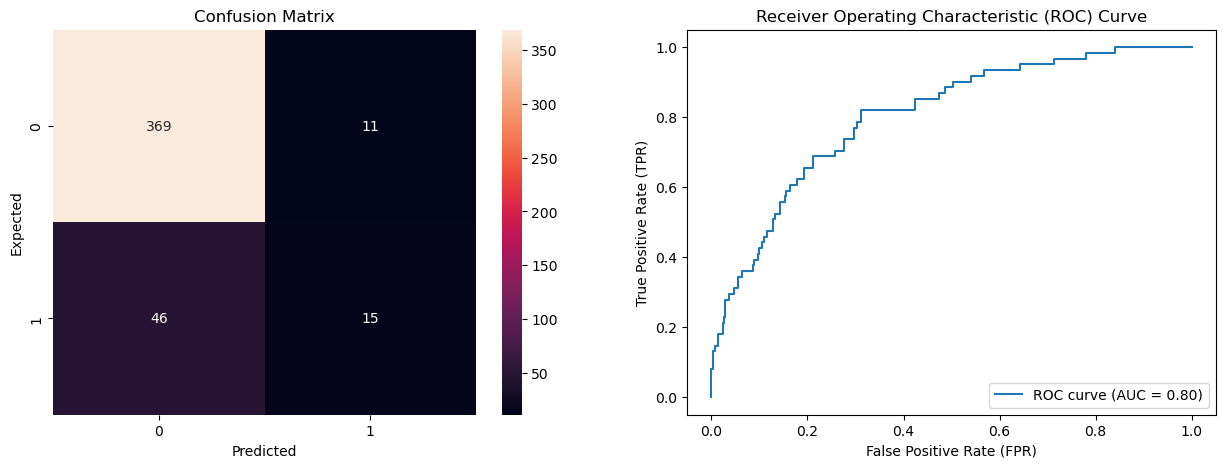

In [117]:
plot_confusion_matrix_and_roc_curve(xgb, xtrain, ytrain, xtest, ytest)

In [130]:

# List of models
models = [logreg,knn,rfc,gb,svm,xgb]

# Create a list to store accuracy results
accuracy_results = []

# Loop through each model
for model in models:
    # Train the model
    model.fit(xtrain, ytrain)
    
    # Make predictions on the test set
    ypred = model.predict(xtest)
    
    # Calculate accuracy
    accuracy = accuracy_score(ytest, ypred)
    
    # Append results to the list
    accuracy_results.append({'Model': str(model), 'Accuracy': accuracy})

# Convert the list of dictionaries to a DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Display the table
accuracy_df


,Model,Accuracy
0,LogisticRegression(),0.863946
1,KNeighborsClassifier(),0.827664
2,RandomForestClassifier(),0.861678
3,GradientBoostingClassifier(),0.879819
4,"SVC(C=1, gamma=1)",0.861678
5,"XGBClassifier(base_score=None, booster=None, c...",0.870748


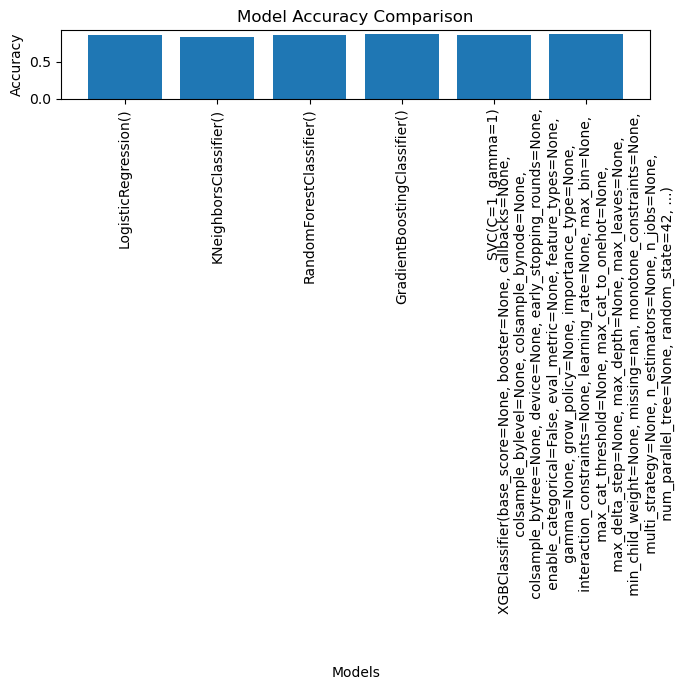

In [131]:
# Create a bar plot for model accuracies
plt.figure(figsize=(7,7))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation= 90,)
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()
